# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment07:\ Logistic\ regression\ for\ a\ binary\ classification\ with\ a\ regularization$<br>
$Deadline: May\ 14, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np; import collections

#Data


In [0]:
path="/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment07/data-nonlinear.txt"
data    = np.genfromtxt(path, delimiter=',')

x  = data[:, 0]
y  = data[:, 1]
label   = data[:, 2]

pointX0 = x[label == 0]
pointY0 = y[label == 0]

pointX1 = x[label == 1]
pointY1 = y[label == 1]

m = label.size

#Logistic regression

$\hat{h} = \sigma(z)$<br>
$z = g(x, y; \theta)$, where $g$ is a high dimensional function and  $\theta \in \mathbb{R}^{100}$<br>
$\theta = (\theta_{0,0}, \theta_{0,1}, \cdots, \theta_{9,9})$<br>
$g(x, y ; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$<br>
$f_{k}(x, y)$ be any high dimensional function of $x$ and $y$<br>
$\sigma(z) = \frac{1}{1 + \exp(-z)}$<br>
$\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$<br><br>

$Initial\ Value$<br>
${\theta}{_i}{_,}{_j} = 1.0,\ for\ all\ i,\ j$

In [0]:
# Variable
theta_num = 100
degree = 10
z = [0, 0, 0]
sigma = [0, 0, 0]
tmp = [0, 0, 0]
theta = [0, 0, 0]
theta_old = [0, 0, 0]
accuracy = [0, 0, 0]
accuracy_history = [0, 0, 0]

# Generate the theta
theta[0] = np.zeros((1, theta_num))[0]
theta[1] = np.zeros((1, theta_num))[0]
theta[2] = np.zeros((1, theta_num))[0]
theta_old[0] = np.zeros((1, theta_num))[0]
theta_old[1] = np.zeros((1, theta_num))[0]
theta_old[2] = np.zeros((1, theta_num))[0]

# Calculate the z
for i in range(0, degree):
    for k in range(0, degree):
        z[0] = z[0] + theta[0][degree*i + k]*(x**i)*(y**k)
        z[1] = z[1] + theta[1][degree*i + k]*(x**i)*(y**k)
        z[2] = z[2] + theta[2][degree*i + k]*(x**i)*(y**k)

# Calculate the sigma
sigma[0] = 1/(1 + np.exp(-z[0]))
sigma[1] = 1/(1 + np.exp(-z[1]))
sigma[2] = 1/(1 + np.exp(-z[2]))

# Check the accuracy
tmp[0] = (np.round(sigma[0]) == label)
tmp[1] = (np.round(sigma[1]) == label)
tmp[2] = (np.round(sigma[2]) == label)
accuracy[0] = collections.Counter(tmp[0])[1] * theta_num / m
accuracy[1] = collections.Counter(tmp[1])[1] * theta_num / m
accuracy[2] = collections.Counter(tmp[2])[1] * theta_num / m

# Record the accuracy
accuracy_history[0] = [accuracy[0]]
accuracy_history[1] = [accuracy[1]]
accuracy_history[2] = [accuracy[2]]

${\alpha} = 0.002$<br>
${\lambda}_1 = 0.01$<br>
${\lambda}_2 = 0.03$<br>
${\lambda}_3 = 0.1$<br>


In [0]:
alpha = 0.002
lamda = [0.01, 0.03, 0.1]

# Objective Function
$J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta))) \right] + \frac{\lambda}{2} \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j}^2$

In [0]:
# Variable
j = [0, 0, 0]
j_old = [0, 0, 0]
j_tmp = [0, 0, 0]
j_history = [0, 0, 0]

for i in range(3):
    # Calculate j
    j_tmp[i] = np.sum(-label*np.log(sigma[i])-(1-label)*np.log(1-sigma[i])) / m
    j[i] = j_tmp[i] + np.sum(theta[i]*theta[i])*lamda[i]/2

    # Recore the j
    j_history[i] = [j[i]]

# Training Process - Gradient Descent
$\theta_{i, j}^{(t+1)} = \theta_{i, j}^{(t)} - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta^{(t)})) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{i, j}} + \lambda \theta_{i, j}^{(t)} \right],\ for\ all\ i,\ j$

In [0]:
# Check the number of iteration
iteration = 1

# Set the two condition because it spent too much time for converge
while (iteration < 60000):
    # Backup the theta
    theta_old = theta

    # Update the theta
    for i in range(0, degree):
        for k in range(0, degree):
            theta[0][degree*i + k] = theta[0][degree*i + k] \
            - alpha*np.sum((sigma[0]-label)*(x**i)*(y**k))/m \
            - alpha*lamda[0]*theta[0][degree*i + k]
            theta[1][degree*i + k] = theta[1][degree*i + k] \
            - alpha*np.sum((sigma[1]-label)*(x**i)*(y**k))/m \
            - alpha*lamda[1]*theta[1][degree*i + k]
            theta[2][degree*i + k] = theta[2][degree*i + k] \
            - alpha*np.sum((sigma[2]-label)*(x**i)*(y**k))/m \
            - alpha*lamda[2]*theta[2][degree*i + k]

    # Update the z
    z = [0, 0, 0]
    for i in range(0, degree):
        for k in range(0, degree):
            z[0] = z[0] + theta[0][degree*i + k]*(x**i)*(y**k)
            z[1] = z[1] + theta[1][degree*i + k]*(x**i)*(y**k)
            z[2] = z[2] + theta[2][degree*i + k]*(x**i)*(y**k)


    # Backup the j
    j_old = j


    for i in range(3):
        # Update the sigma
        sigma[i] = 1/(1 + np.exp(-z[i]))

        # Update j
        j_tmp[i] = np.sum(-label*np.log(sigma[i]) - (1-label)*np.log(1-sigma[i])) / m
        j[i] = j_tmp[i] + np.sum(theta[i]*theta[i])*lamda[i]/2

        # Check the accuracy
        tmp[i] = (np.round(sigma[i]) == label)
        accuracy[i] = collections.Counter(tmp[i])[1] * theta_num / m

        # Record the history of parameter
        j_history[i].append(j[i])
        accuracy_history[i].append(accuracy[i])

    iteration = iteration +1



#Check the Convergence

In [7]:
# Iteration
print("# Iteration: " + str(iteration) + '\n')

# J - over, Energy Value
print("J-Over Diff: " + str(j[0] - j_old[0]) + '\n')

# J - over, Energy Value
print("J-Just Diff: " + str(j[1] - j_old[1]) + '\n')

# J - over, Energy Value
print("J-Under Diff: " + str(j[2] - j_old[2]) + '\n')

# Iteration: 60000

J-Over Diff: 0.0

J-Just Diff: 0.0

J-Under Diff: 0.0



# Grid


In [0]:
# Grid variable
x_range = np.arange(-1, 1.25, 0.01)
y_range = np.arange(-1, 1.25, 0.01)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Variable
z_ = [0, 0, 0]
sigma_grid = [0, 0, 0]
sigma_visual = [0, 0, 0]

# Calculate z with grid
for i in range(0, degree):
    for k in range(0, degree):
        z_[0] = z_[0] + theta[0][degree*i + k]*(x_grid**i)*(y_grid**k)
        z_[1] = z_[1] + theta[1][degree*i + k]*(x_grid**i)*(y_grid**k)
        z_[2] = z_[2] + theta[2][degree*i + k]*(x_grid**i)*(y_grid**k)

# Calculate sigma with grid
sigma_grid[0] = 1/(1 + np.exp(-z_[0]))
sigma_grid[1] = 1/(1 + np.exp(-z_[1]))
sigma_grid[2] = 1/(1 + np.exp(-z_[2]))

___
#Result

#1. Training Data

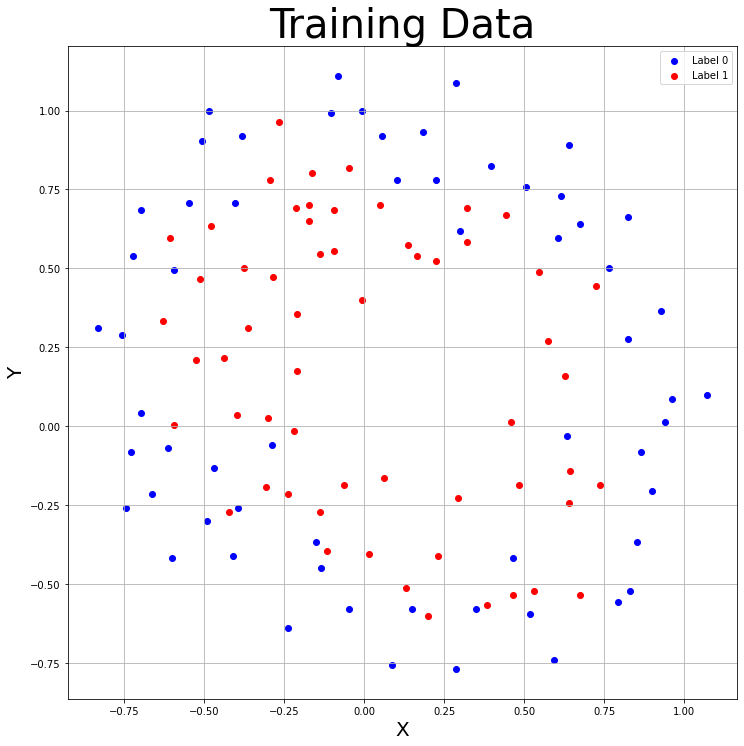

In [9]:
plt.figure(figsize=(12,12))
plt.scatter(pointX0, pointY0, c='b', label='Label 0')
plt.scatter(pointX1, pointY1, c='r', label='Label 1')
plt.grid()
plt.legend()
plt.title('Training Data', fontsize=40)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

#2. Training Error with Varying Regularization Parameters

Text(0, 0.5, 'Error')

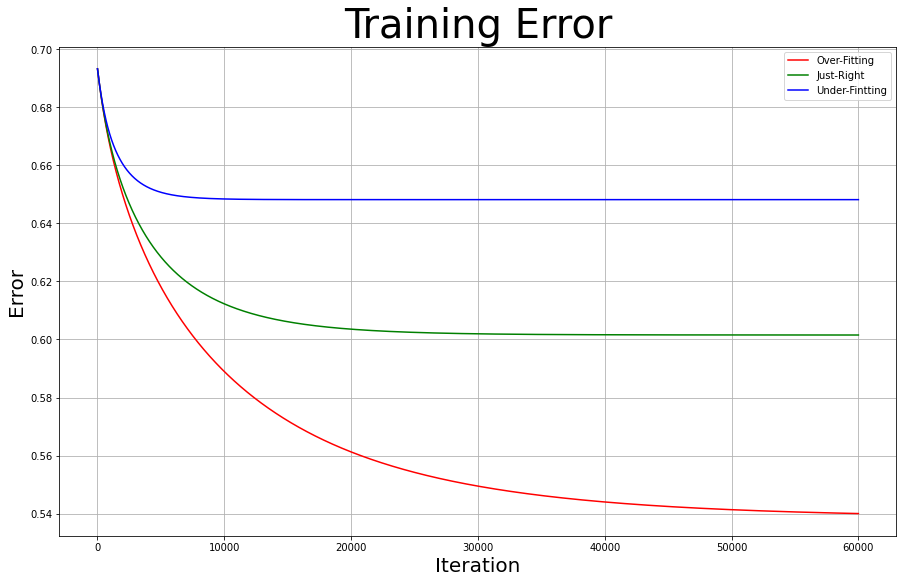

In [10]:
plt.figure(figsize=(15,9))
plt.plot(j_history[0], color='red', label='Over-Fitting')
plt.plot(j_history[1], color='green', label='Just-Right')
plt.plot(j_history[2], color='blue', label='Under-Fintting')
plt.grid()
plt.legend()
plt.title('Training Error', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Error', fontsize=20)

#3. Values of the Chosen Regularization Parameters

In [11]:
print('\033[91m' + 'Over-fitting λ: ' + str(lamda[0]))
print('\033[92m' + 'Just-fitting λ: ' + str(lamda[1]))
print('\033[34m' + 'Just-fitting λ: ' + str(lamda[2]))

Over-fitting λ: 0.01
Just-fitting λ: 0.03
Just-fitting λ: 0.1


#4. Training Accuracy with Varying Regularization Parameters

Text(0, 0.5, 'Accuracy')

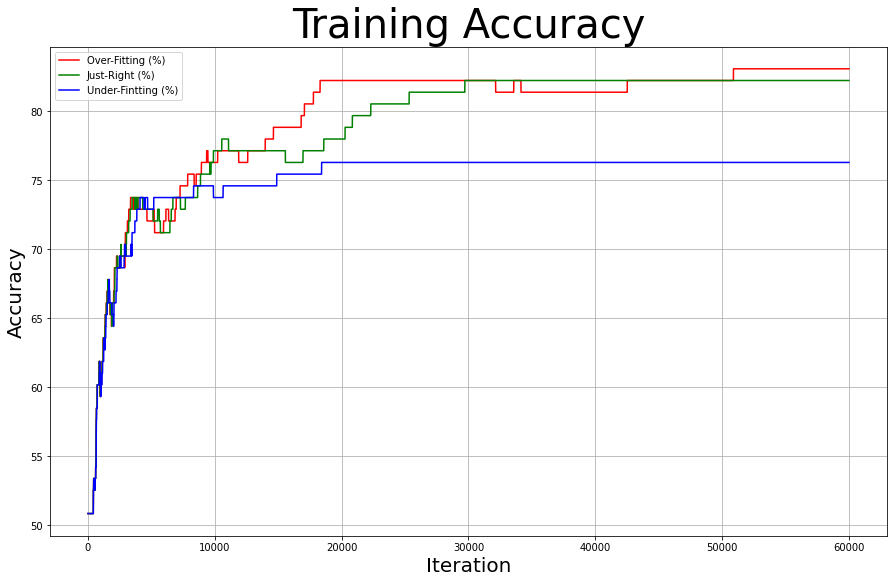

In [12]:
plt.figure(figsize=(15,9))
plt.plot(accuracy_history[0], color='red', label='Over-Fitting (%)')
plt.plot(accuracy_history[1], color='green', label='Just-Right (%)')
plt.plot(accuracy_history[2], color='blue', label='Under-Fintting (%)')
plt.grid()
plt.legend()
plt.title('Training Accuracy', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

#5. Final Training Accuracy with Varying Regularization Parameters

In [15]:
print('\033[91m' + 'Over-fitting Accuracy: ' + str(accuracy[0]) + ' (%)')
print('\033[92m' + 'Just-fitting Accuracy: ' + str(accuracy[1]) + ' (%)')
print('\033[34m' + 'Just-fitting Accuracy: ' + str(accuracy[2]) + ' (%)')

Over-fitting Accuracy: 83.05084745762711 (%)
Just-fitting Accuracy: 82.20338983050847 (%)
Just-fitting Accuracy: 76.27118644067797 (%)


#6. Optimal Classifier with Varying Regularization Parameters Superimposed on the Training Data

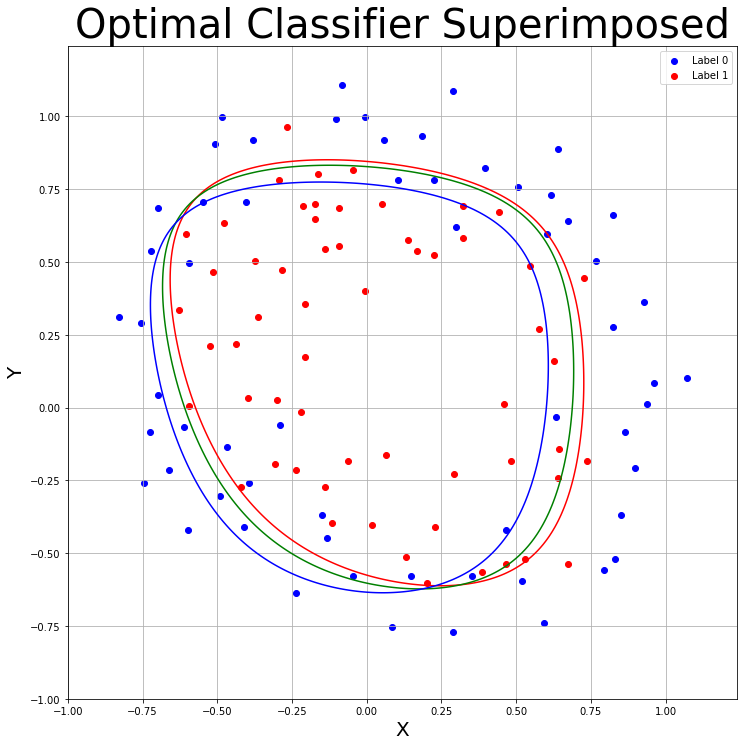

In [14]:
plt.figure(figsize=(12,12))
plt.contour(x_grid, y_grid, sigma_grid[0], levels=[0.5], colors='r')
plt.contour(x_grid, y_grid, sigma_grid[1], levels=[0.5], colors='g')
plt.contour(x_grid, y_grid, sigma_grid[2], levels=[0.5], colors='b')
plt.scatter(pointX0, pointY0, c='b', label='Label 0')
plt.scatter(pointX1, pointY1, c='r', label='Label 1')
plt.grid()
plt.legend()
plt.title('Optimal Classifier Superimposed', fontsize=40)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()